## Two datasets were analysed to identify which school factors (size, type or assigned budget) determine students' passing scores on math and reading subjects. The students' dataset contains more than 30,000 records. 

### Import Python dependencies 

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###  Read CSVs

In [95]:
students_csv = "students.csv"
schools_csv = "schools.csv"
students = pd.read_csv(students_csv)
schools = pd.read_csv(schools_csv)

### Preview DataFrames

In [96]:
schools.head()

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500


In [187]:
students.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58
4,4,Bonnie Ray,F,9th,Huang High School,97,84


### Merge both DataFrames

In [98]:
complete = pd.merge(students, schools, how="left", on=["school_name", "school_name"])
complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


### Analyse the complete district

In [99]:
total_schools = len(complete["school_name"].unique())
total_students = (complete.shape[0])
reading_score = (complete["reading_score"].sum())/total_students
math_score = (complete["math_score"].sum())/total_students
passed_reading= len(complete.loc[complete["reading_score"]>=70])/total_students*100
passed_math = len(complete.loc[complete["math_score"]>=70])/total_students*100
passed_both = len(complete.loc[(complete["math_score"]>=70) & (complete["reading_score"]>=70),:])/total_students*100
groupby_schools = complete["budget"].groupby(complete["school_name"])
pre_budget= groupby_schools.mean()
total_budget = pre_budget.sum(axis=0)

In [100]:
district_summary = pd.DataFrame({"Total Schools":[total_schools], "Total Students":[total_students], "Total Budget":[total_budget], "Average Math Score":[math_score],
                               "Average Reading Score":[reading_score], "% Passing Math": [passed_math], "% Passing Reading": [passed_reading],"% Overall Passing": [passed_both]}) 

district_summary.head()

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,39170,24649428,78.985371,81.87784,74.980853,85.805463,65.172326


### Analyse DataFrame grouped by schools

In [101]:
complete_df = complete[["type","reading_score", "math_score", "size", "budget", "school_name"]]

#### Find number of students who passed math, reading and both subjects 

In [102]:
math_passers = complete_df[complete_df["math_score"]>=70].groupby(["school_name","type"])["math_score"].count()
reading_passers = complete_df[complete_df["reading_score"]>=70].groupby(["school_name","type"])["reading_score"].count()
overall_passers = complete_df[(complete_df["reading_score"]>=70) & (complete_df["math_score"]>=70)].groupby(["school_name","type"])["reading_score"].count()

#### Group data by school name and type (charter or district)

In [103]:
school_groups = complete_df.groupby(["school_name", "type"])

#### Find the mean for the numerical columns 

In [104]:
comparison = school_groups.mean()

#### Join new columns with the % of passing students 

In [105]:
comparison["Per Student Budget"] = comparison["budget"]/comparison["size"]
comparison["% Passing Math"] = math_passers/comparison["size"]*100
comparison["% Passing Reading"] = reading_passers/comparison["size"]*100
comparison["% Overall Passing"] = overall_passers/comparison["size"]*100

#### Rename the old columns

In [106]:
renamed= comparison.rename(columns = {"reading_score":"Average Reading Score", "math_score": "Average Math Score", "size":"Size", "budget": "Budget"})
renamed

,,Average Reading Score,Average Math Score,Size,Budget,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Bailey High School,District,81.033963,77.048432,4976.0,3124928.0,628.0,66.680064,81.933280,54.642283
Cabrera High School,Charter,83.975780,83.061895,1858.0,1081356.0,582.0,94.133477,97.039828,91.334769
Figueroa High School,District,81.158020,76.711767,2949.0,1884411.0,639.0,65.988471,80.739234,53.204476
Ford High School,District,80.746258,77.102592,2739.0,1763916.0,644.0,68.309602,79.299014,54.289887
Griffin High School,Charter,83.816757,83.351499,1468.0,917500.0,625.0,93.392371,97.138965,90.599455
Hernandez High School,District,80.934412,77.289752,4635.0,3022020.0,652.0,66.752967,80.862999,53.527508
Holden High School,Charter,83.814988,83.803279,427.0,248087.0,581.0,92.505855,96.252927,89.227166
Huang High School,District,81.182722,76.629414,2917.0,1910635.0,655.0,65.683922,81.316421,53.513884
Johnson High School,District,80.966394,77.072464,4761.0,3094650.0,650.0,66.057551,81.222432,53.539172


### Find Top 5 Performing Schools by % Overall Passing 

#### Sort the dataframe by the values in the overall passing column

In [107]:
best_schools = renamed.sort_values(["% Overall Passing"], ascending=False).head(5)
best_schools

,,Average Reading Score,Average Math Score,Size,Budget,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Cabrera High School,Charter,83.975780,83.061895,1858.0,1081356.0,582.0,94.133477,97.039828,91.334769
Thomas High School,Charter,83.848930,83.418349,1635.0,1043130.0,638.0,93.272171,97.308869,90.948012
Griffin High School,Charter,83.816757,83.351499,1468.0,917500.0,625.0,93.392371,97.138965,90.599455
Wilson High School,Charter,83.989488,83.274201,2283.0,1319574.0,578.0,93.867718,96.539641,90.582567
Pena High School,Charter,84.044699,83.839917,962.0,585858.0,609.0,94.594595,95.945946,90.540541


### Find Bottom 5 Performing Schools by % Overall Passing 

#### Sort the dataframe by the values in the overall passing column

In [108]:
worst_schools = renamed.sort_values(["% Overall Passing"], ascending=True).head(5)
worst_schools

,,Average Reading Score,Average Math Score,Size,Budget,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Rodriguez High School,District,80.744686,76.842711,3999.0,2547363.0,637.0,66.366592,80.220055,52.988247
Figueroa High School,District,81.158020,76.711767,2949.0,1884411.0,639.0,65.988471,80.739234,53.204476
Huang High School,District,81.182722,76.629414,2917.0,1910635.0,655.0,65.683922,81.316421,53.513884
Hernandez High School,District,80.934412,77.289752,4635.0,3022020.0,652.0,66.752967,80.862999,53.527508
Johnson High School,District,80.966394,77.072464,4761.0,3094650.0,650.0,66.057551,81.222432,53.539172


### Find Average Math Scores by Grade for Each School

In [109]:
nine = students.loc[students["grade"]=="9th"].groupby(["school_name"])["math_score"].mean()
ten = students.loc[students["grade"]=="10th"].groupby(["school_name"])["math_score"].mean()
eleven = students.loc[students["grade"]=="11th"].groupby(["school_name"])["math_score"].mean()
twelve = students.loc[students["grade"]=="12th"].groupby(["school_name"])["math_score"].mean()
math_grade_summary = pd.DataFrame({"9th":nine,"10th":ten, "11th": eleven, "12th": twelve})
math_grade_summary

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248


### Find Average Reading Scores by Grade for Each School

In [110]:
nine_r = students.loc[students["grade"]=="9th"].groupby(["school_name"])["reading_score"].mean()
ten_r = students.loc[students["grade"]=="10th"].groupby(["school_name"])["reading_score"].mean()
eleven_r = students.loc[students["grade"]=="11th"].groupby(["school_name"])["reading_score"].mean()
twelve_r = students.loc[students["grade"]=="12th"].groupby(["school_name"])["reading_score"].mean()
r_grade_summary = pd.DataFrame({"9th":nine_r,"10th":ten_r, "11th": eleven_r, "12th": twelve_r})
r_grade_summary

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564


### Does the budget dedicated to students affect their scores?

In [111]:
scores_s = renamed.drop(columns = ["Size", "Budget"])
bins = [0,584,629, 644, 675]
groups = ["<$584", "$585 - $629", "$630 - $644", "$645 - $675"]
scores_s["Spending Ranges -Per Student-"]=pd.cut(scores_s["Per Student Budget"], bins, labels=groups, include_lowest= True) 
scores_spending = scores_s.groupby("Spending Ranges -Per Student-")
scores_spending.mean()

,Average Reading Score,Average Math Score,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges -Per Student-,,,,,,
<$584,83.933814,83.455399,581.000000,93.460096,96.610877,90.369459
$585 - $629,83.155286,81.899826,615.500000,87.133538,92.718205,81.418596
$630 - $644,81.624473,78.518855,639.500000,73.484209,84.391793,62.857656
$645 - $675,81.027843,76.997210,652.333333,66.164813,81.133951,53.526855


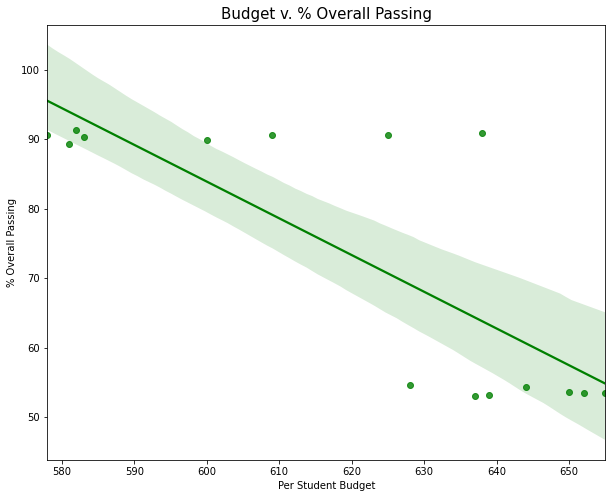

In [185]:
fig = plt.figure(figsize=(10,8))
ax = sns.regplot(x="Per Student Budget", y="% Overall Passing", data=scores_s, color="green")
plt.title('Budget v. % Overall Passing', fontsize = 15)
plt.show()

#### Observable trend: schools that receive more money per student do not perform better than those that have a smaller budget.

### Does the school size affect students' overall passing %?

In [114]:
scores_z = renamed.drop(columns = ["Per Student Budget", "Budget"])
bins_z = [0,999,2000,5000]
groups_z = ["Small <1000", "Medium 1000 to 2000", "Large 2000 to 5000"]
scores_z["School Size"]=pd.cut(scores_z["Size"], bins_z, labels=groups_z, include_lowest= True)
scores_size = scores_z.groupby("School Size")
scores_size.mean()

,Average Reading Score,Average Math Score,Size,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,,
Small <1000,83.929843,83.821598,694.500,93.550225,96.099437,89.883853
Medium 1000 to 2000,83.864438,83.374684,1704.400,93.599695,96.790680,90.621535
Large 2000 to 5000,81.344493,77.746417,3657.375,69.963361,82.766634,58.286003


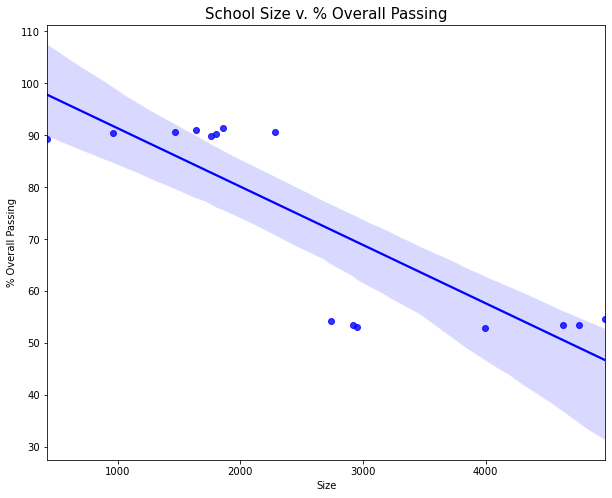

In [184]:
fig = plt.figure(figsize=(10,8))
bx = sns.regplot(x="Size", y="% Overall Passing", data=scores_z, color="blue")
plt.title('School Size v. % Overall Passing', fontsize = 15)
plt.show()

#### Observable trend: smaller schools perform better than larger ones. 

### Does the school type affect students' overall passing %?

In [166]:
scores_t = renamed.drop(columns = ["Per Student Budget", "Budget", "Size"])
scores_type = scores_t.groupby(["type"], as_index=False)
scores_type.mean()

,Average Reading Score,Average Math Score,% Passing Math,% Passing Reading,% Overall Passing
0,83.896421,83.473852,93.620830,96.586489,90.432244
1,80.966636,76.956733,66.548453,80.799062,53.672208


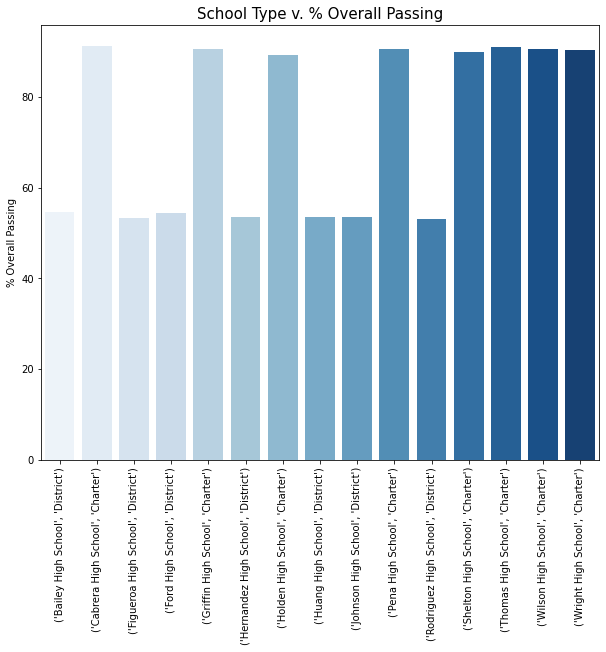

In [183]:
fig = plt.figure(figsize=(10,8))
lx= sns.barplot(x=scores_t.index, y="% Overall Passing", data = scores_t, palette="Blues")
lx.set_xticklabels(lx.get_xticklabels(), rotation=90)
plt.title('School Type v. % Overall Passing', fontsize = 15)
plt.show()

#### Observable trend: charter schools perform almost twice better than district schools. 